# What is PyTorch
---
It’s a Python based scientific computing package targeted at two sets of audiences:
- A replacement for numpy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

![](https://drive.google.com/uc?export=view&id=1OgDjsU6MiXAtHJUId9YawQv8_CKPOrY8)


In [ ]:
# import NumPy
import numpy as np

# import Pytorch
import torch
print(torch.__version__)

1.7.0+cu101


## Tensors

Tensors are similar to numpy’s ndarrays, with the addition being that they can also be used on a GPU to accelerate computing. 
![](https://drive.google.com/uc?export=view&id=1tNv5mhCl_kEiIqUoO3f6Xl1MM7z8mfU3)

There are more to a PyTorch tensor than just being a replacement to numpy's ndarrays, but we shall see about them later.

### Basics

Let's now see how to do basic matrix operations using PyTorch and how they compare with NumPy operations.

Construct a 5x3 matrix, uninitialized:

In [ ]:
x = torch.Tensor(5, 3)
print(x)

tensor([[1.8252e-35, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 1.5414e-43],
        [1.3733e-14, 6.4069e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [3.8016e-39, 1.4013e-43, 6.0053e-36]])


Construct a randomly initialized matrix

In [ ]:
# Numpy example
x_np = np.random.rand(5,3)
print(x_np)

[[0.2919292  0.91393647 0.3561537 ]
 [0.58949241 0.21578928 0.0491365 ]
 [0.99990074 0.57630252 0.68861249]
 [0.53755722 0.83875331 0.67719543]
 [0.83406753 0.32771742 0.60256653]]


In [ ]:
# Pytorch example
x_th = torch.rand(5, 3)
print(x_th)

tensor([[0.8609, 0.5083, 0.9444],
        [0.1474, 0.4849, 0.7570],
        [0.5336, 0.9543, 0.4910],
        [0.4485, 0.1488, 0.5169],
        [0.6819, 0.7364, 0.9087]])


Check the datatype

In [ ]:
# Datatype for Numpy ndarray
print(x_np.dtype)

# Datatype for Pytorch tensor
print(x_th.dtype)

float64
torch.float32


Check the size

In [ ]:
# Check size for Numpy ndarray
print(x_np.shape)

# Check size for PyTorch tensor
print(x_th.size())

(5, 3)
torch.Size([5, 3])


Operations Supported

In [ ]:
# Numpy example
x_np = np.array([4, 5, 10], dtype=float) # creating a numpy ndarray
y_np = np.array([12,10, 9], dtype=float) # creating a numpy ndarray
out_np = x_np + y_np #addition operation
print(out_np)

[16. 15. 19.]


In [ ]:
# Torch example
x_th = torch.FloatTensor([4, 5, 10]) # creating a torch tensor
y_th = torch.FloatTensor([12,10, 9]) # creating a torch tensor
out_th = x_th + y_th # addition operation
print(out_th)

tensor([16., 15., 19.])


The same addition operator can also be written as:

In [ ]:
# Numpy example
x_np = np.array([4, 5, 10], dtype=float) # creating a numpy ndarray
y_np = np.array([12,10, 9], dtype=float) # creating a numpy ndarray
out_np = np.add(x_np, y_np) #addition operation
print(out_np)

# Pytorch example
x_th = torch.FloatTensor([4, 5, 10]) # creating a torch tensor
y_th = torch.FloatTensor([12,10, 9]) # creating a torch tensor
out_th = torch.add(x_th, y_th) # addition operation
print(out_th)

[16. 15. 19.]
tensor([16., 15., 19.])


Torch also supports in-place operation:

**Note:** Any operation that mutates a tensor in-place is post-fixed with a _.

In [ ]:
y_th.add_(x_th)
print(y_th)

tensor([20., 20., 29.])


Like NumPy, there are many Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described here https://pytorch.org/docs/stable/tensors.html

### Numpy Bridge

Converting a torch Tensor to a numpy array and vice versa is a breeze.

**Note:** The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

In [ ]:
# Converting torch Tensor to numpy Array
x_th = torch.ones(5)
print(x_th)

tensor([1., 1., 1., 1., 1.])


In [ ]:
y_np = x_th.numpy()
print(y_np)

[1. 1. 1. 1. 1.]


Now, Try changing the values of the torch tensor `x_th` and then print the numpy array `y_np`

In [ ]:
x_th.add_(1)
print(x_th)
print(y_np)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting numpy arrays to torch tensors

In [ ]:
x_np = np.ones(5)
y_th = torch.from_numpy(x_np)

np.add(x_np, 1, out=x_np)

print(x_np)
print(y_th)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


###  Using GPU (CUDA Tensors)

In [ ]:
# let us run this cell only if CUDA is available
x_th = torch.FloatTensor([4, 5, 10])
y_th = torch.FloatTensor([12,10, 9])

if torch.cuda.is_available():
    x_th = x_th.to('cuda')
    y_th = y_th.to('cuda')
    x_th.add_(y_th)
    
print(x_th)
print(x_th.dtype)

tensor([16., 15., 19.], device='cuda:0')
torch.float32


### Autograd: automatic differentiation

Now we will look at the more advanced features of a Pytorch tensor. A pytorch tensor has three primary attributes, `.data`, `.grad`, and `.grad_fn`. You can access the raw values stored in the tensor with the `.data` attribute and the gradient with respect to this tensor is stored into `.grad`. The third attribute `.grad_fn` a _function/operation_ object that created the tensor.

Any function/operation in Pytorch also has two basic components, the `forward()` function computes the operation being performed and the `backward()` function computes the gradient of the operation.

![](https://drive.google.com/uc?export=view&id=1TVAPtG6wGMxuXWkFK33bu5kmORqFcO-I)

The **autograd** package in Pytorch provides the functionality of automatic differentiation. This automates the process of computing gradients of the operations (or the backward passes). When using _autograd_, the forward pass of the operation defines a _computational graph_, where the nodes in the graph will be tensors, and the edges will be the functions that produce output tensors from input tensors. Thus, backpropagating through this graph allows you to easily compute gradients. Using _autograd_ is pretty simple in practice. Every tensor in the computational graph that has its attribute `.requires_grad` set to `True` will compute the gradient automatically when you will call the `.backward()` function. To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being tracked.

Let's now see this in action through examples.

In [ ]:
x_th = torch.ones(2, 2, requires_grad=True)
print(x_th)
print(x_th.data)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
y_th = x_th + 2
print(y_th)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


`y` was created as a result of an operation, so it has a grad_fn.

In [ ]:
print(y_th.grad_fn)

In [ ]:
z_th = y_th * y_th * 3
out_th = z_th.mean()
print(z_th, out_th)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


**Gradients**

Let’s backprop now Because out contains a single scalar, `out_th.backward()` is equivalent to `out_th.backward(torch.tensor(1))`.

In [ ]:
out_th.backward()
print(x_th.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


 We got the tensor matrix of `4.5`. Lets call the out tensor "O". so we have that $O = \frac{1}{4} \sum_i z_i$, ​   $z_i​ = 3 (x_i ​+ 2)^2$ and $z_i​\mid_{x_i=1} ​= 27$. Therefore $\frac{\partial O}{\partial x_i} = 4.5$. 

 Let's see a more concrete example.

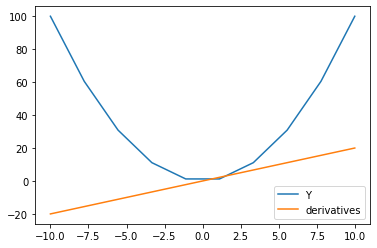

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

x = torch.linspace(-10.0,10.0,10, requires_grad=True)
Y = x**2
y = torch.sum(x**2)     
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label="Y")
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label="derivatives")
plt.legend()

For the documentation, read here [link](https://pytorch.org/docs/stable/autograd.html). 
 
 You can learn more about PyTorch here [link](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) [Recommended]